In [7]:
%matplotlib inline
from lib.my_gapp import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import quad, dblquad

In [2]:
omk = np.linspace(-1,1,101)

like = np.array([return_gp_ohd_loglike(ok) for ok in omk])

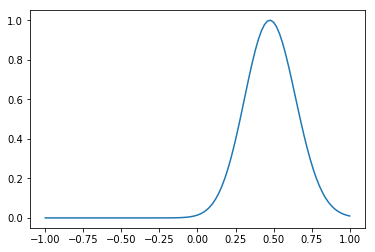

In [3]:
plt.plot(omk, np.exp(like-np.max(like)))

In [25]:
omk = np.linspace(-1,1,101)
fe = np.linspace(0.8,1.5,101)

like1 = np.array([[margin_of_MB_SL_loglike(ok, f) for ok in omk] for f in fe])



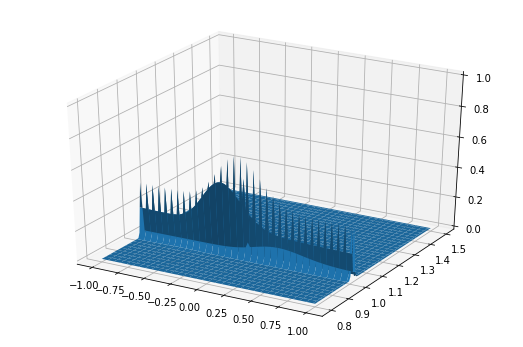

In [33]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(omk,fe)

ax.plot_surface(X,Y,np.exp(like1 -np.max(like1)))

In [32]:
np.max(like1)

-101.65331269786425

In [31]:
#==========================================
def lcdm_hz(z,omm=0.3,h0=70,omk=0.0):
    return h0*np.sqrt(omm*(1+z)**3+(1-omm-omk)+omk*(1+z)**2)

def lcdm_dz(z,omm=0.3,h0=70,omk=0.0):
    func = lambda x: 1/lcdm_hz(x,omm,h0,omk)
    dz, err = quad(func, 0.0, z)
    
    if(omk > 1e-8):
        return 1/np.sqrt(omk)*np.sinh(h0*np.sqrt(omk) *dz)
    if(omk < -1e-8):
        return 1/np.sqrt(-omk)*np.sin(h0*np.sqrt(-omk) *dz)
    return h0*dz

def lcdm_mu_p(z,omm=0.3,h0=70):
    try:
        n = len(z)
    except:
        n = 1
    if (n==1):
        return 5*np.log10((1+z)*lcdm_dz(z,omm,h0))
    dz = np.array([lcdm_dz(zi,omm,h0) for zi in z])
    return 5*np.log10((1+z)*dz)

def M_prime(mudl, mobs, sig):
    B = np.sum((mudl-mobs)/sig**2)
    C = np.sum(1/sig**2)
    return -B/C 

In [32]:
#==========================================
#sn_file = bytes("/home/ekli/myworks/cosmodata/sn_full_dat.txt", "utf8")
sn_file = bytes("/home/ekli/myworks/cosmodata/sn_full_lnz_dat.txt", "utf8")
sn_cov = bytes("/home/ekli/myworks/cosmodata/sn_full_cov.txt", "utf8")

sndat = np.loadtxt("/home/ekli/myworks/cosmodata/sn_full_lnz_dat.txt", unpack=True)

#Mb = sndat[1] - lcdm_mu_p(sndat[0])
#mMb = np.mean(Mb)
mudl = lcdm_mu_p(np.exp(sndat[0]))
mMb = M_prime(mudl, sndat[1], sndat[2])
print(mMb)

23.810068888814374


In [33]:
#np.log10(rec_distance_noM(1090)/(1+1090)*3e5/70/12.8)/0.2

In [34]:
#===========================================

N = 1048

initial_gapp(N, sn_file)
initial_gapp_cov(N, sn_cov)
setup_gapp(39.21533362, 12.97267722) # for lz
#setup_gapp(24.49128409, 0.14743146) # for z

lz = np.linspace(-5.,1.3, 51)
zz = np.exp(lz)

mu = np.array([rec_mu(z) for z in lz])
sig = np.array([np.sqrt(rec_covariance(z,z) ) for z in lz])
#mu = np.array([rec_mu(z) for z in zz])
#sig = np.array([np.sqrt(rec_covariance(z,z) ) for z in zz])

dzm = 1/(1+zz)*np.exp(np.log(10)/5*(mu))
dz = np.array([rec_distance_noM(z) for z in zz])
dz_sig = np.array([rec_cov_distance_noM(z,z) for z in zz])
lc_dz = np.array([lcdm_dz(z) for z in zz])


In [35]:
zz

array([0.00673795, 0.00764273, 0.00866902, 0.00983311, 0.01115352,
       0.01265124, 0.01435008, 0.01627704, 0.01846275, 0.02094197,
       0.0237541 , 0.02694386, 0.03056193, 0.03466586, 0.03932086,
       0.04460096, 0.05059007, 0.05738341, 0.06508898, 0.07382927,
       0.08374323, 0.09498845, 0.1077437 , 0.12221176, 0.13862262,
       0.15723717, 0.17835131, 0.20230072, 0.22946609, 0.2602793 ,
       0.29523017, 0.33487431, 0.37984196, 0.43084797, 0.48870316,
       0.55432728, 0.62876355, 0.71319529, 0.8089647 , 0.91759423,
       1.04081077, 1.1805731 , 1.33910302, 1.51892067, 1.72288464,
       1.95423732, 2.21665655, 2.51431399, 2.85194153, 3.23490642,
       3.66929667])

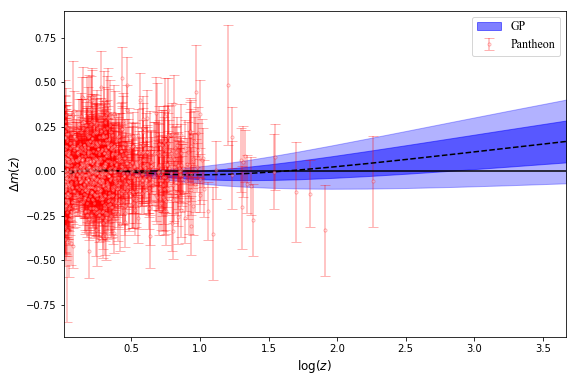

In [36]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }
#============================
plt.figure(figsize=(9,6))

plt.errorbar(np.exp(sndat[0]), sndat[1]-(lcdm_mu_p(np.exp(sndat[0]))+mMb), sndat[2], 
        fmt='.', markerfacecolor='white', capsize=5,
        color='red', alpha=0.3,
            label='Pantheon')

plt.plot(zz, mu-(lcdm_mu_p(zz)+mMb), '--k')
plt.fill_between(zz, mu+sig-(lcdm_mu_p(zz)+mMb), 
                 mu-sig-(lcdm_mu_p(zz)+mMb), color='blue', alpha=0.5,
                label='GP')
plt.fill_between(zz, mu+2*sig-(lcdm_mu_p(zz)+mMb), 
                 mu-2*sig-(lcdm_mu_p(zz)+mMb), color='blue', alpha=0.3)

#plt.plot(zz, lcdm_mu_p(zz)+mMb, '-g')
#plt.plot(zz, zz-zz, '-k')
plt.axhline(0, ls='-', color='k')

plt.xlim(zz[0], zz[-1])
plt.ylabel(r'$\Delta m(z)$', font)
plt.xlabel(r'$\log(z)$', font)
#plt.xscale('log')

plt.legend(loc='best', prop=font)

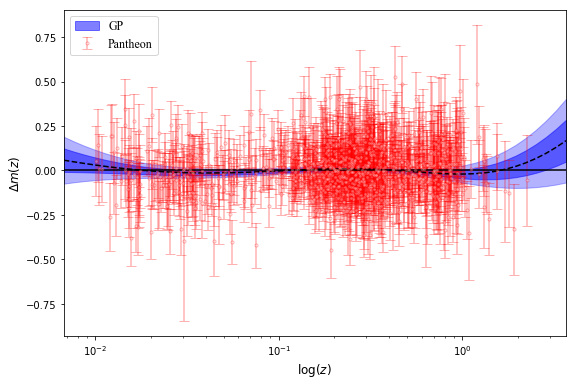

In [37]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }
#============================
plt.figure(figsize=(9,6))

plt.errorbar(np.exp(sndat[0]), sndat[1]-(lcdm_mu_p(np.exp(sndat[0]))+mMb), sndat[2], 
        fmt='.', markerfacecolor='white', capsize=5,
        color='red', alpha=0.3,
            label='Pantheon')

plt.plot(zz, mu-(lcdm_mu_p(zz)+mMb), '--k')
plt.fill_between(zz, mu+sig-(lcdm_mu_p(zz)+mMb), 
                 mu-sig-(lcdm_mu_p(zz)+mMb), color='blue', alpha=0.5,
                label='GP')
plt.fill_between(zz, mu+2*sig-(lcdm_mu_p(zz)+mMb), 
                 mu-2*sig-(lcdm_mu_p(zz)+mMb), color='blue', alpha=0.3)

#plt.plot(zz, lcdm_mu_p(zz)+mMb, '-g')
#plt.plot(zz, zz-zz, '-k')
plt.axhline(0, ls='-', color='k')

plt.xlim(zz[0], zz[-1])
plt.ylabel(r'$\Delta m(z)$', font)
plt.xlabel(r'$\log(z)$', font)
plt.xscale('log')

plt.legend(loc='best', prop=font)

plt.savefig('rec_mu.pdf')

<ErrorbarContainer object of 3 artists>

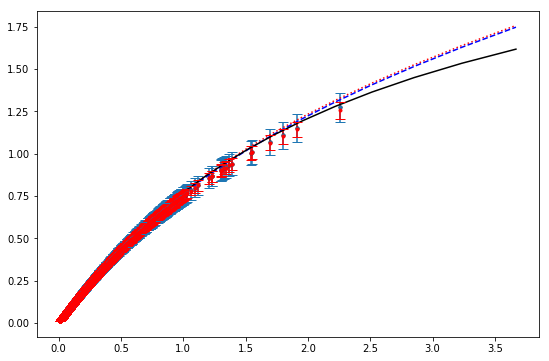

In [38]:
#ohd_dz = np.loadtxt('Pantheon_gapp_dz.txt', unpack=True)
ohd_dz = np.loadtxt('./data/Pantheon_out_dc.txt', unpack=True)
#=============================
plt.figure(figsize=(9,6))
plt.plot(zz, dzm/10**(0.2*mMb)+0.01, ':r')
plt.plot(zz, dz/10**(0.2*mMb), '--b')

plt.plot(zz, lc_dz, '-k')
plt.plot(ohd_dz[0], ohd_dz[1], '.k')
plt.errorbar(ohd_dz[0], ohd_dz[1], ohd_dz[2], fmt='.', capsize=5)

ohd_dz = np.loadtxt('./data/Pantheon_out_dc_51.txt', unpack=True)
plt.errorbar(ohd_dz[0], ohd_dz[1], ohd_dz[2], fmt='.', capsize=5, color='red')


<ErrorbarContainer object of 3 artists>

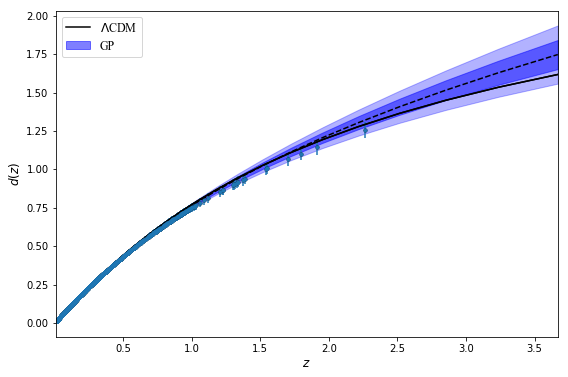

In [21]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }
#============================
plt.figure(figsize=(9,6))

plt.plot(zz, dz/10**(0.2*mMb), '--k')
plt.fill_between(zz, (dz+np.sqrt(dz_sig))/10**(0.2*mMb), 
                 (dz-np.sqrt(dz_sig))/10**(0.2*mMb), color='b', alpha=0.5,
                label='GP')
plt.fill_between(zz, (dz+2*np.sqrt(dz_sig))/10**(0.2*mMb), 
                 (dz-2*np.sqrt(dz_sig))/10**(0.2*mMb), color='b', alpha=0.3)
plt.plot(zz, lc_dz, '-k', label=r'$\Lambda$CDM')

plt.xlim(zz[0], zz[-1])
plt.ylabel(r'$d(z)$', font)
plt.xlabel(r'$z$', font)
#plt.xscale('log')

plt.legend(loc='best', prop=font)

plt.plot(zz, lc_dz, '-k')
plt.plot(ohd_dz[0], ohd_dz[1], '.k')
plt.errorbar(ohd_dz[0], ohd_dz[1], ohd_dz[2], fmt='.')

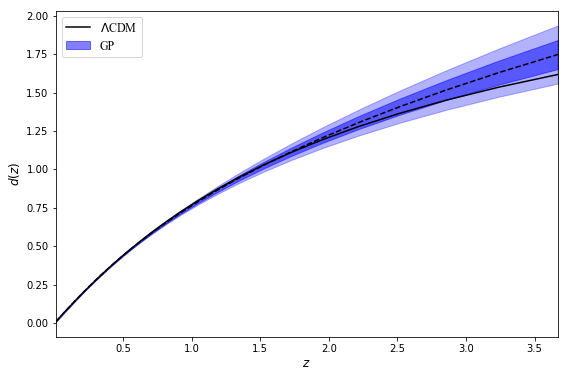

In [22]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }
#============================
plt.figure(figsize=(9,6))

plt.plot(zz, dz/10**(0.2*mMb), '--k')
plt.fill_between(zz, (dz+np.sqrt(dz_sig))/10**(0.2*mMb), 
                 (dz-np.sqrt(dz_sig))/10**(0.2*mMb), color='b', alpha=0.5,
                label='GP')
plt.fill_between(zz, (dz+2*np.sqrt(dz_sig))/10**(0.2*mMb), 
                 (dz-2*np.sqrt(dz_sig))/10**(0.2*mMb), color='b', alpha=0.3)
plt.plot(zz, lc_dz, '-k', label=r'$\Lambda$CDM')

plt.xlim(zz[0], zz[-1])
plt.ylabel(r'$d(z)$', font)
plt.xlabel(r'$z$', font)
#plt.xscale('log')

plt.legend(loc='upper left', prop=font)

plt.savefig('rec_dz.pdf')


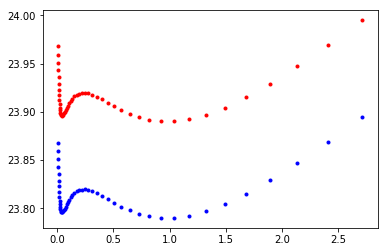

In [123]:

#=============================
plt.figure()
plt.plot(zz, 5*np.log10(dz/lc_dz), '.b')
plt.plot(zz, 5*np.log10(dzm/lc_dz)+0.1, '.r')

plt.show()

## time delay

In [125]:
mMb

23.810068888814374

In [124]:
file_TDSL = "/home/ekli/myworks/cosmodata/time_delay_obs.txt"
tdsldat = np.loadtxt(file_TDSL, unpack=True)

tdsldat

array([[6.3040e-01, 2.9500e-01, 4.5460e-01, 7.4800e-01],
       [1.3940e+00, 6.5400e-01, 1.6930e+00, 1.7890e+00],
       [7.0531e+00, 6.4682e+00, 7.5793e+00, 7.8817e+00],
       [2.2824e-01, 2.0560e-01, 1.0312e-01, 2.0160e-01],
       [4.0000e+03, 1.3888e+03, 6.5390e+02, 3.1274e+03]])

In [134]:
for i in range(4):
    print("%3d"%i, end=" ")
    zl = tdsldat[0,i]
    zs = tdsldat[1,i]
    dl = rec_distance_noM(zl)/10**(0.2*mMb)
    ds = rec_distance_noM(zs)/10**(0.2*mMb)
    print("%12.6f %12.6f"%(zl,zs), end=" ")
    print("%20.8e %20.8e"%(dl, ds), end=" ")
    print("%20.8e"%(ds*dl/(ds-dl)*3e5/70), end=" ")
    print("%12.6f"%tdsldat[-1,i], end=" ")
    
    print("")

  0     0.630400     1.394000       5.34035711e-01       9.67409238e-01       5.10906427e+03  4000.000000 
  1     0.295000     0.654000       2.75653224e-01       5.50226651e-01       2.36738782e+03  1388.800000 
  2     0.454600     1.693000       4.05651425e-01       1.10098170e+00       2.75273993e+03   653.900000 
  3     0.748000     1.789000       6.12517368e-01       1.14091081e+00       5.66807907e+03  3127.400000 


In [142]:
def tdsl_x(dl,ds,omk):
    return dl*ds/(ds*np.sqrt(1+omk*dl**2) - dl*np.sqrt(1+omk*ds**2))

def tdsl_loglike(omk,h0=70):
    chisq = 0
    for i in range(4):
        zl = tdsldat[0,i]
        zs = tdsldat[1,i]
        dl = rec_distance_noM(zl)/10**(0.2*mMb)
        ds = rec_distance_noM(zs)/10**(0.2*mMb)
        x= tdsl_x(dl,ds,omk)*3e5/h0
        
        chisq += (np.log(np.abs(x-tdsldat[4])) - tdsldat[2])**2/tdsldat[4]**2 + np.log(np.abs(x-tdsldat[4])*tdsldat[3])
    return -0.5*np.sum(chisq)
    

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


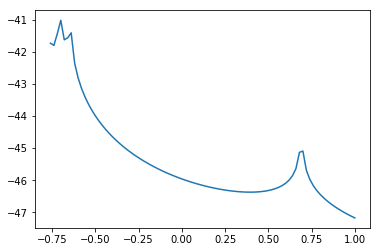

In [144]:
omk = np.linspace(-1,1,101)
ll = np.array([tdsl_loglike(ok) for ok in omk])

plt.plot(omk, ll)

## test likelihood

In [52]:
#================================
file_SL = "/home/ekli/myworks/cosmodata/strong_lens_obs_real.txt"
sldat = np.loadtxt(file_SL, unpack=True)

mMb = 23.810068888814374
FMB = 10**(0.2*mMb)

def dls(dl,ds,omk=0.0):
    return ds*np.sqrt(1+omk*dl**2) - dl*np.sqrt(1+omk*ds**2)

def Dth(dl,ds,omk=0.0):
    return np.sqrt(1+omk*dl**2) - dl/ds*np.sqrt(1+omk*ds**2)

def loglike(dl,ds,omk):
    return -0.5*np.sum((Dth(dl,ds,omk)-sldat[-2])**2/sldat[-1]**2)



for zl, zs, obs in zip(sldat[0], sldat[1], sldat[-2]):
    print("%12.6f %12.6f "%(zl, zs), end=' ')
    dl = rec_distance_noM(zl)
    ds = rec_distance_noM(zs)
    #print("%20.6f %20.6f "%(dl, ds), end=' ')
    ldl = lcdm_dz(zl)*10**(0.2*mMb)
    lds = lcdm_dz(zs)*10**(0.2*mMb)
    print("%10.6f %10.6f "%((ldl-dl)/ldl, (lds-ds)/lds), end=' ')
    print("%10.6f"%(dls(dl,ds,0.0)/ds), end=' ')
    print("%10.6f"%(dls(dl,ds,0.0)/ds - obs), end=' ')
    print("")

    0.194000     0.446000   -0.004066   0.000160    0.533802  -0.048378 
    0.237000     0.531000   -0.004452   0.002694    0.514498  -0.044612 
    0.104000     0.615000    0.000723   0.004912    0.806161   0.012031 
    0.158000     0.735000   -0.002928   0.007324    0.747275  -0.173375 
    0.173000     0.472000   -0.003510   0.000951    0.602284  -0.212576 
    0.185000     0.514000   -0.003862   0.002203    0.605584  -0.367036 
    0.063000     0.535000    0.004971   0.002808    0.867450   0.009360 
    0.134000     0.419000   -0.001627  -0.000661    0.655746   0.012766 
    0.178000     0.811000   -0.003668   0.008339    0.737473  -0.141837 
    0.137000     0.610000   -0.001817   0.004791    0.744326  -0.095404 
    0.181000     0.578000   -0.003755   0.003982    0.649966   0.107356 
    0.408000     1.670000   -0.000992  -0.001977    0.661744  -0.106656 
    0.522000     2.162000    0.002436  -0.018075    0.644673   0.120953 
    0.723000     1.686000    0.007127  -0.002427   

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


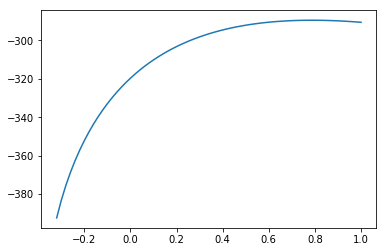

In [53]:
dl = np.array([rec_distance_noM(zl)/FMB for zl in sldat[0]])
ds = np.array([rec_distance_noM(zs)/FMB for zs in sldat[1]])

omk = np.linspace(-1,1,101)
ss = np.array([loglike(dl,ds, ok) for ok in omk])

plt.plot(omk, ss)

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


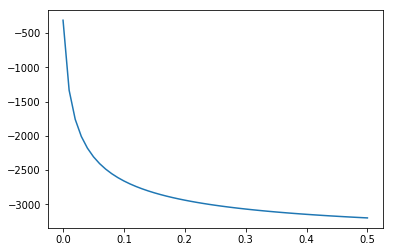

In [58]:
def lc_loglike(omk):
    dl = np.array([lcdm_dz(zl,omk=omk) for zl in sldat[0]])
    ds = np.array([lcdm_dz(zs,omk=omk) for zs in sldat[1]])
    return -0.5*np.sum((Dth(dl,ds,omk)-sldat[-2])**2/sldat[-1]**2)



omk = np.linspace(-0.5,0.5,101)
ss = np.array([lc_loglike(ok) for ok in omk])

plt.plot(omk, ss)

## reconstruct $H(z)$

In [65]:
N = 51
ohddat = np.loadtxt('/home/ekli/myworks/cosmodata/OHD_51.txt', unpack=True)
sigf =170.75260325
lenf=2.61947963

In [66]:
initial_gapp(N, bytes('/home/ekli/myworks/cosmodata/OHD_51.txt', "utf8"))
#initial_gapp_cov(N, sn_cov)
setup_gapp(sigf, lenf)

0

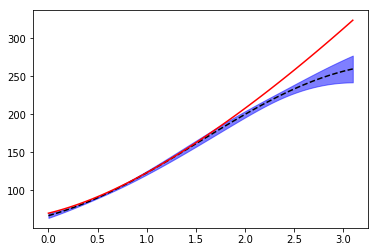

In [73]:
zz = np.linspace(0.0,3.1,101)

hz = np.array([rec_mu(z) for z in zz])
sig = np.array([np.sqrt(rec_covariance(z,z)) for z in zz])

plt.plot(zz, hz, '--k')
plt.fill_between(zz, hz+sig, hz-sig, color='blue', alpha=0.5)
plt.plot(zz, lcdm_hz(zz), '-r')

$$
    d_c = \int_0^z \frac{H_0}{H(z')} dz', d_z = \frac{1}{\sqrt{\Omega_k}} \sinh\left[\sqrt{\Omega_k} d_c \right]
$$

$$
    \text{Cov}[d_c^i, d_c^j] = d_c^i d_c^j \frac{\text{Cov}[H_0, H_0]}{H_0 H_0} 
    - d_c^i \int_0^{z_j} \frac{H_0}{H(x)} \frac{\text{Cov}[H_0, H_x]}{H_0 H_x} dx
    - d_c^j \int_0^{z_i} \frac{H_0}{H(x)} \frac{\text{Cov}[H_x, H_0]}{H_x H_0} dx
    + \int_0^{z_i} \int_0^{z_j} \frac{H_0}{H(x)} \frac{H_0}{H(y)} \frac{\text{Cov}[H_x, H_y]}{H_x H_y} dx dy
$$

0.0 0.0 0.0 0.0
1.875865034624845e-06 1.7759315921937527e-06 1.7759315921937527e-06 1.6821484579734353e-06
7.375004459402309e-06 6.607858373478358e-06 6.607858373478358e-06 5.932193600695157e-06
1.630739308978878e-05 1.3823688507034171e-05 1.3823688507034171e-05 1.1770427732415783e-05
2.8486987221043366e-05 2.284087370428709e-05 2.284087370428709e-05 1.8458974272687132e-05
4.3732212269590516e-05 3.315886006722832e-05 3.315886006722832e-05 2.5453421985287176e-05
6.186638163791114e-05 4.4351671055138374e-05 4.4351671055138374e-05 3.236254266608546e-05
8.27180493041004e-05 5.606070766037725e-05 5.606070766037725e-05 3.891506011346796e-05
0.00010612129923667667 6.798783179080272e-05 6.798783179080272e-05 4.4932496512611126e-05
0.00013191597520688007 7.988879419014311e-05 7.988879419014311e-05 5.030720758043162e-05
0.000159947854921504 9.156703427302807e-05 9.156703427302807e-05 5.49847826441528e-05
0.00019006877264013546 0.00010286789528439901 0.00010286789528439901 5.895010076015139e-05
0

0.004260131791219184 0.0003422979020449638 0.0003422979020449638 0.00019251449117343243
0.004307071643684673 0.000339699967429761 0.000339699967429761 0.00019062426028070137
0.004354086747777953 0.00033670871796399074 0.00033670871796399074 0.0001889114301854011
0.0044011851212215685 0.00033331111091675536 0.00033331111091675536 0.0001874384575683163


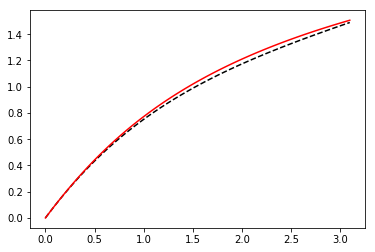

In [83]:
func = lambda x: rec_mu(0.0)/rec_mu(x)
dz = np.array([quad(func, 0.0, z)[0] for z in zz])
lcdz = np.array([lcdm_dz(z) for z in zz])

def cov(x,y):
    func = lambda x: rec_mu(0.0)/rec_mu(x)
    dci = quad(func, 0.0, x)[0]
    dcj = quad(func, 0.0, y)[0]
    c00 = dci * dcj * rec_covariance(0,0)/rec_mu(0.0)/rec_mu(0.0)
    func = lambda z: rec_mu(0.0)/rec_mu(z)*rec_covariance(0.0,z)/rec_mu(0.0)/rec_mu(z)
    c0j = dci * quad(func, 0, y)[0]
    ci0 = dcj * quad(func, 0, x)[0]
    func = lambda zi, zj: rec_mu(0.0)/rec_mu(zi)*rec_mu(0.0)/rec_mu(zi)*rec_covariance(zi,zj)/rec_mu(zi)/rec_mu(zj)
    cij = dblquad(func, 0, x, 0, y)[0]
    print(c00,c0j,ci0,cij)
    return c00 - c0j -ci0 +cij
    
sig = np.array([np.sqrt(cov(z,z)) for z in zz])

plt.plot(zz, dz, '--k')
#plt.fill_between(zz, hz+sig, hz-sig, color='blue', alpha=0.5)
plt.plot(zz, lcdz, '-r')

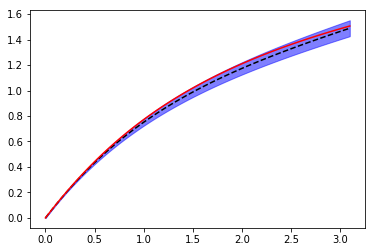

In [84]:
plt.plot(zz, dz, '--k')
plt.fill_between(zz, dz+sig, dz-sig, color='blue', alpha=0.5)
plt.plot(zz, lcdz, '-r')

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


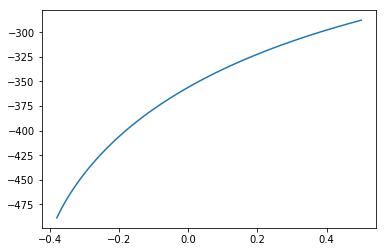

In [86]:
def lc_loglike(omk):
    func = lambda x: rec_mu(0.0)/rec_mu(x)
    dl = np.array([quad(func, 0.0, zl)[0] for zl in sldat[0]])
    ds = np.array([quad(func, 0.0, zs)[0] for zs in sldat[1]])
    return -0.5*np.sum((Dth(dl,ds,omk)-sldat[-2]/1.2)**2/sldat[-1]**2)



omk = np.linspace(-0.5,0.5,101)
ss = np.array([lc_loglike(ok) for ok in omk])

plt.plot(omk, ss)

# GAPP 二维输入

In [145]:
from gapp import gp

In [146]:
sl_dat = np.loadtxt('/home/ekli/myworks/cosmodata/strong_lens_obs.txt', unpack=True)

In [149]:
sl_dat.shape

(8, 205)

In [186]:
X = sl_dat[:2]
Y = sl_dat[6]
Sigma = sl_dat[7]

In [189]:
xmin = [0.0, 0.0]
xmax = [3.6, 3.6]
nstar = [51, 51]

g = gp.GaussianProcess(X.T, Y, Sigma, cXstar=(xmin, xmax, nstar))

initheta = [0.5, 0.4, 0.3]
rec, theta = g.gp()


Optimized hyperparameters:
theta = [0.57535924 0.43518307]


In [159]:
theta

array([0.57535924, 0.43518307])

In [190]:
rec

array([[0.00000000e+00, 0.00000000e+00, 2.68391077e-01, 1.44145188e-01],
       [0.00000000e+00, 7.20000000e-02, 4.18437611e-01, 1.05601521e-01],
       [0.00000000e+00, 1.44000000e-01, 5.69904969e-01, 8.04839761e-02],
       ...,
       [3.60000000e+00, 3.45600000e+00, 3.56897530e-09, 5.75359238e-01],
       [3.60000000e+00, 3.52800000e+00, 2.83395292e-09, 5.75359238e-01],
       [3.60000000e+00, 3.60000000e+00, 2.20889979e-09, 5.75359238e-01]])

In [191]:
rec.shape

(2601, 4)

In [192]:
zl = np.reshape(rec[:,0], (51,51))
zs = np.reshape(rec[:,1], (51,51))

dls = np.reshape(rec[:,2], (51,51))
sig = np.reshape(rec[:,3], (51,51))

In [193]:
zs

array([[0.   , 0.072, 0.144, ..., 3.456, 3.528, 3.6  ],
       [0.   , 0.072, 0.144, ..., 3.456, 3.528, 3.6  ],
       [0.   , 0.072, 0.144, ..., 3.456, 3.528, 3.6  ],
       ...,
       [0.   , 0.072, 0.144, ..., 3.456, 3.528, 3.6  ],
       [0.   , 0.072, 0.144, ..., 3.456, 3.528, 3.6  ],
       [0.   , 0.072, 0.144, ..., 3.456, 3.528, 3.6  ]])

In [194]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

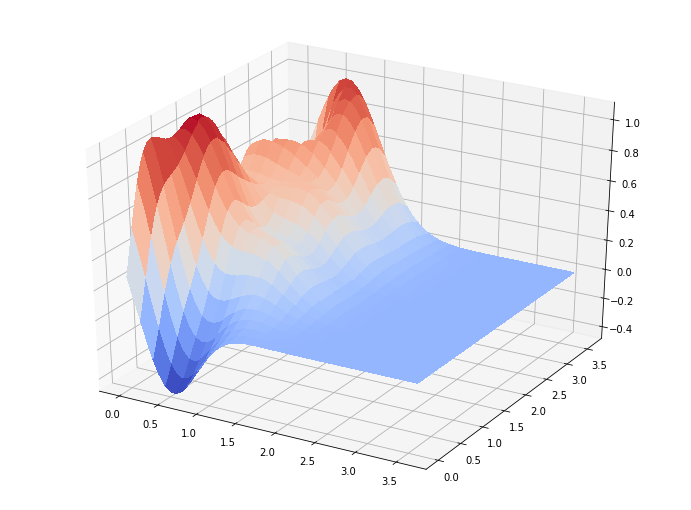

In [195]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(zl, zs, dls, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

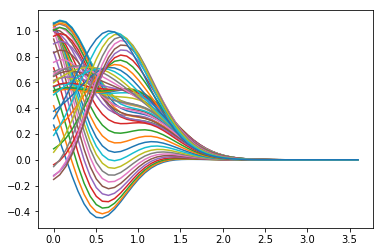

In [176]:
plt.plot(zl, dls)

plt.show()

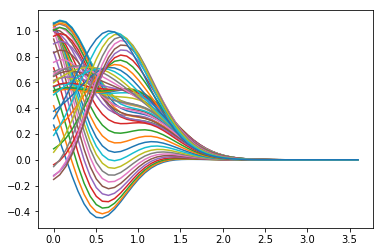

In [177]:
plt.plot(zs.T, dls)

plt.show()

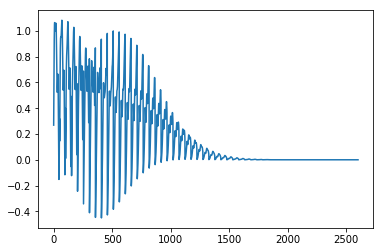

In [180]:
plt.plot(rec[:,0], rec[:,2])

## use $z_s -z_l$

In [182]:
X = sl_dat[1]-sl_dat[0]
Y = sl_dat[6]
Sigma = sl_dat[7]

xmin = 0.0
xmax = 3.6
nstar = 51

g = gp.GaussianProcess(X.T, Y, Sigma, cXstar=(xmin, xmax, nstar))

rec, theta = g.gp()


Optimized hyperparameters:
theta = [0.54536174 0.13995105]


In [183]:
rec

array([[0.00000000e+00, 1.74053155e-01, 1.54936953e-01],
       [7.20000000e-02, 3.29482494e-01, 3.33432739e-02],
       [1.44000000e-01, 4.05395558e-01, 1.79712494e-02],
       [2.16000000e-01, 4.58165097e-01, 1.64842367e-02],
       [2.88000000e-01, 5.85183894e-01, 1.46077768e-02],
       [3.60000000e-01, 6.91005787e-01, 1.88791663e-02],
       [4.32000000e-01, 7.02108126e-01, 1.97996004e-02],
       [5.04000000e-01, 7.29977390e-01, 1.95124260e-02],
       [5.76000000e-01, 8.17462500e-01, 2.34056370e-02],
       [6.48000000e-01, 8.37609619e-01, 2.73969975e-02],
       [7.20000000e-01, 7.20925679e-01, 2.69767371e-02],
       [7.92000000e-01, 5.95544871e-01, 2.98332738e-02],
       [8.64000000e-01, 5.70009483e-01, 4.01167026e-02],
       [9.36000000e-01, 5.72596671e-01, 4.13152331e-02],
       [1.00800000e+00, 6.04155994e-01, 6.06028757e-02],
       [1.08000000e+00, 7.53056116e-01, 6.39752220e-02],
       [1.15200000e+00, 8.51217832e-01, 5.75207719e-02],
       [1.22400000e+00, 6.63966

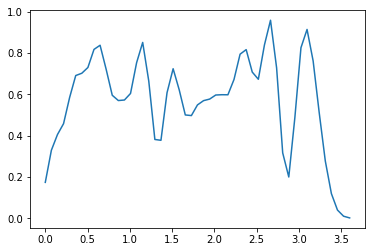

In [184]:
plt.plot(rec[:,0], rec[:,1])

# SN data to dz

In [46]:
from gapp import gp

In [42]:
sndatdz = np.loadtxt('/home/ekli/myworks/cosmodata/sn_dat_to_dz.txt', unpack=True)
#sncovdz = np.loadtxt('/home/ekli/myworks/cosmodata/sn_cov_to_dz.txt', unpack=True)

X = sndatdz[0]
Y = sndatdz[1]
sig = sndatdz[2]
n = X.shape[0]
#Cov = np.reshape(sncovdz, (n, n)) + np.eye(n)*sig**2
Cov = np.eye(n)*sig**2

In [43]:
np.sqrt(1100399)

1048.9990467107202

In [44]:
sig

array([0.      , 0.025923, 0.02373 , ..., 0.085134, 0.088178, 0.085515])

In [47]:
xmin = np.min(X)
xmax = np.max(X)
nstar = 51

initheta = [np.max(Y), 5]
g = gp.GaussianProcess(X,Y, Cov, cXstar=(xmin,xmax,nstar))                      
rec, theta = g.gp(theta=initheta)  

KeyboardInterrupt: 

# test dz

In [2]:
from lib.my_gapp import *

In [3]:
initial_gapp(int(1048), bytes('/home/ekli/myworks/cosmodata/sn_dat_to_dz.txt', 'utf8'))
#initial_gapp_cov(int(1048), bytes('/home/ekli/myworks/cosmodata/sn_cov_to_dz.txt', 'utf8'))

#sigf = 0.950708
#lenf = 3.283936
#sigf = 2.6
#lenf = 3.218750
#sigf = 3.527734
#lenf = 1.303711

sigf = 2.481592
lenf = 2.759277

setup_gapp(sigf, lenf)

0

In [4]:
zz = np.linspace(0.0,3.5,101)

dzs = np.array([rec_mu(z) for z in zz])
sig = np.array([np.sqrt(rec_covariance(z,z)) for z in zz])

/home/ekli/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [5]:
sndatdz = np.loadtxt('/home/ekli/myworks/cosmodata/sn_dat_to_dz.txt', unpack=True)
sncovdz = np.loadtxt('/home/ekli/myworks/cosmodata/sn_cov_to_dz.txt', unpack=True)

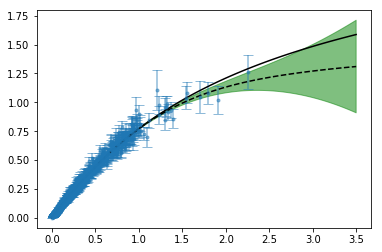

In [11]:


plt.errorbar(sndatdz[0], sndatdz[1], sndatdz[2], fmt='.', capsize=5, alpha=0.5)

plt.plot(zz, dzs,'--k')
plt.fill_between(zz, dzs+sig, dzs-sig, alpha=0.5, color='green')

lc_dz = np.array([lcdm_dc(z) for z in zz])

plt.plot(zz, lc_dz, '-k', label=r'$\Lambda$CDM')

#plt.xscale('log')

# from OHD reconst dz

In [2]:
initial_gapp(int(51), bytes('/home/ekli/myworks/cosmodata/OHD_51.txt', 'utf8'))
#initial_gapp_cov(int(1048), bytes('/home/ekli/myworks/cosmodata/sn_cov_to_dz.txt', 'utf8'))
sigf = 170.75260325
lenf = 2.61947963

setup_gapp(sigf, lenf)

0

In [9]:
def rec_hz(z):
    try:
        n = len(z)
    except:
        n = 1
    if(n == 1):
        return rec_mu(z)    
    return np.array([rec_mu(zi) for zi in z])

def rec_Ez(z):
    try:
        n = len(z)
    except:
        n = 1
    if(n == 1):
        return rec_mu(z)/rec_mu(0.0)
    return np.array([rec_mu(zi)/rec_mu(0.0) for zi in z]) 

def rec_Tau(z):
    try:
        n = len(z)
    except:
        n = 1
    if(n == 1):
        return rec_mu(0.0)/rec_mu(z)
    return np.array([rec_mu(0.0)/rec_mu(zi) for zi in z]) 

def rec_cxy_over_xy(x,y):
    return rec_covariance(x,y)/rec_mu(x)/rec_mu(y)

def rec_cov_Tau(x,y):
    return rec_Tau(x)*rec_Tau(y)*(rec_cxy_over_xy(0,0)
                                  -rec_cxy_over_xy(0,y)
                                  -rec_cxy_over_xy(x,0)
                                 +rec_cxy_over_xy(x,y))

def rec_sig_hz(x):
    try:
        n = len(x)
    except:
        n = 1
    if(n==1):
        return np.sqrt(rec_covariance(x,x))
    return np.array([np.sqrt(rec_covariance(xi,xi)) for xi in x])

def func(z):
    return rec_mu(0.0)/rec_mu(z)

def rec_dc(z):
    try:
        n = len(z)
    except:
        n = 1
    if(n==1):
        return quad(func, 0.0, z)[0]
    return np.array([quad(func, 0.0, x)[0] for x in z])

def rec_sig_dc(z):
    try:
        n = len(z)
    except:
        n = 1
    if(n==1):
        ss = dblquad(rec_cov_Tau, 0.0, z, 0.0, z)[0]
        return np.sqrt(ss)
    ss = np.array([dblquad(rec_cov_Tau, 0.0, zi, 0.0, zi)[0] for zi in z])
    return np.sqrt(ss)

#==========================================
def lcdm_hz(z,omm=0.3,h0=70,omk=0.0):
    return h0*np.sqrt(omm*(1+z)**3+1-omm+omk*(1+z)**2)

def lcdm_dc(z,omm=0.3,h0=70,omk=0.0):
    func = lambda x: h0/lcdm_hz(x,omm,h0,omk)
    dz = lambda x: quad(func, 0.0, x)[0]
    try:
        n = len(z)
    except:
        n = 1
    if(n==1):
        return dz(z)
    return np.array([dz(x) for x in z])

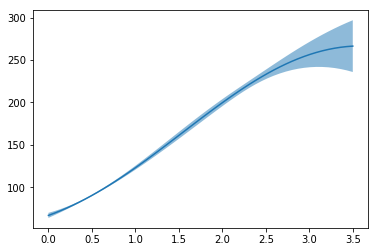

In [4]:
zs = np.linspace(0,3.5,51)

hz = rec_hz(zs)
sig = rec_sig_hz(zs)

plt.plot(zs, hz)
plt.fill_between(zs, hz+sig, hz-sig, alpha=0.5)

In [5]:
dc = rec_dc(zs)
sigdc = rec_sig_dc(zs)



In [6]:
dcc = np.array([int_mu0_over_mu(z) for z in zs])
sigdcc = np.array([np.sqrt(cov_int_mu0_over_mu(z,z)) for z in zs])

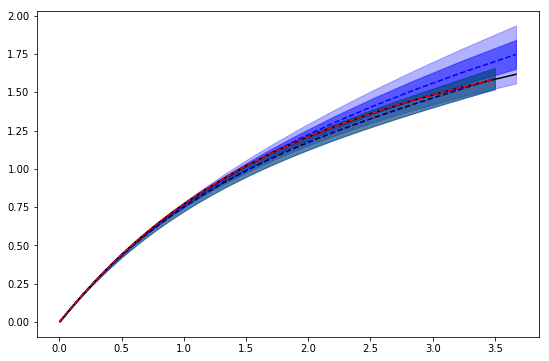

In [40]:
plt.figure(figsize=(9,6))

plt.plot(zz, dz/10**(0.2*mMb), '--b')
plt.fill_between(zz, (dz+np.sqrt(dz_sig))/10**(0.2*mMb), 
                 (dz-np.sqrt(dz_sig))/10**(0.2*mMb), color='b', alpha=0.5,
                label='GP')
plt.fill_between(zz, (dz+2*np.sqrt(dz_sig))/10**(0.2*mMb), 
                 (dz-2*np.sqrt(dz_sig))/10**(0.2*mMb), color='b', alpha=0.3)
plt.plot(zz, lc_dz, '-k', label=r'$\Lambda$CDM')

plt.plot(zs, dc, '--k')
plt.plot(zs, dcc, ':b')

plt.fill_between(zs, dc+sigdc, dc-sigdc, color='green', alpha=0.5)
plt.fill_between(zs, dcc+sigdcc, dc-sigdcc, color='b', alpha=0.3)

plt.plot(zs, lcdm_dc(zs), '--r')

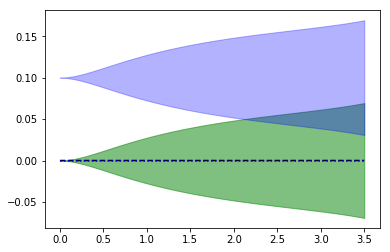

In [18]:
plt.plot(zs, dc-dcc, '--k')
plt.plot(zs, dcc-dcc, ':b')

plt.fill_between(zs, dc+sigdc-dcc, dc-sigdc-dcc, color='green', alpha=0.5)
plt.fill_between(zs, dcc+sigdcc-dcc+0.1, dc-sigdcc-dcc+0.1, color='b', alpha=0.3)